# Laboratorio 1 - Visión por Computadora
## Integrantes:

- Javier Alvarado - 21188
- Mario Guerra - 21008
- Emilio Solano - 21212


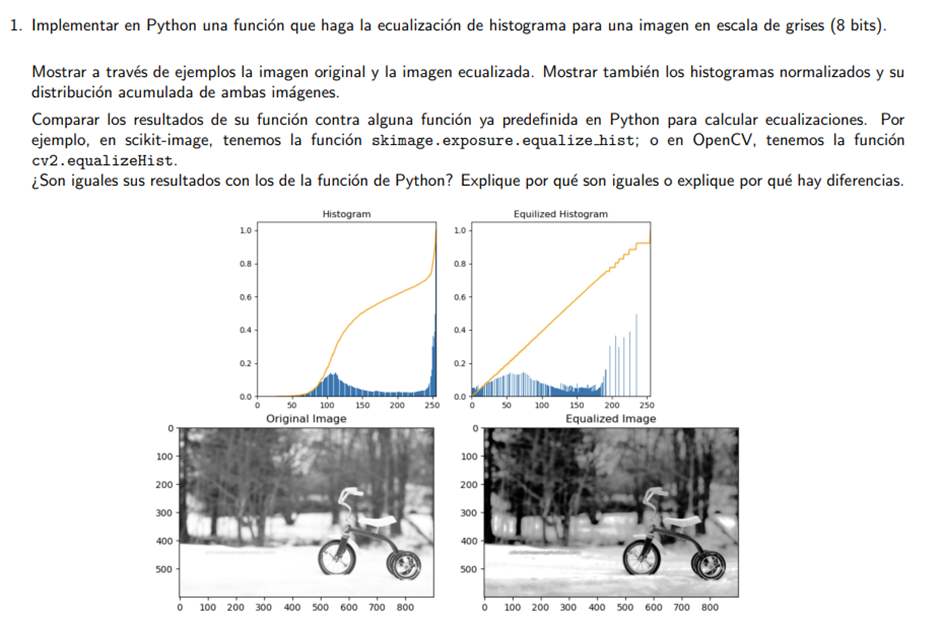

In [ ]:
# Código para Ejercicio 1.

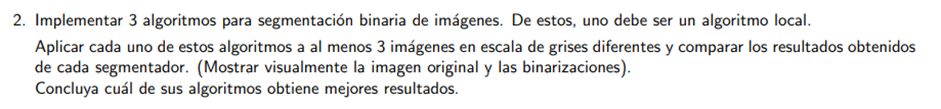

In [ ]:
# Código para Ejercicio 2.

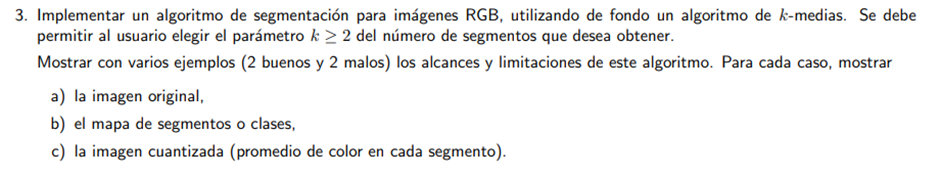

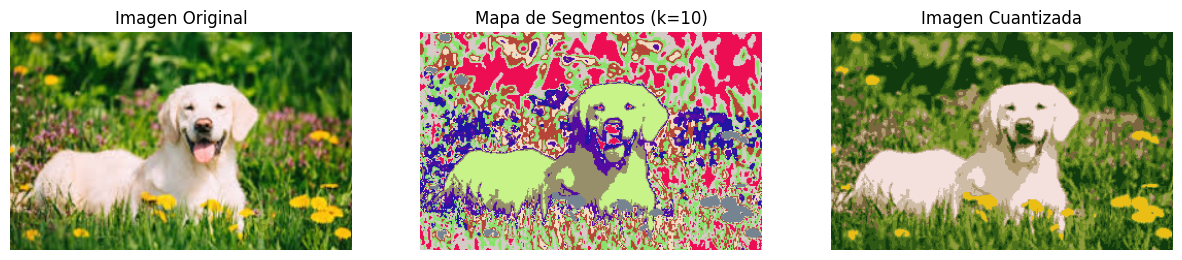

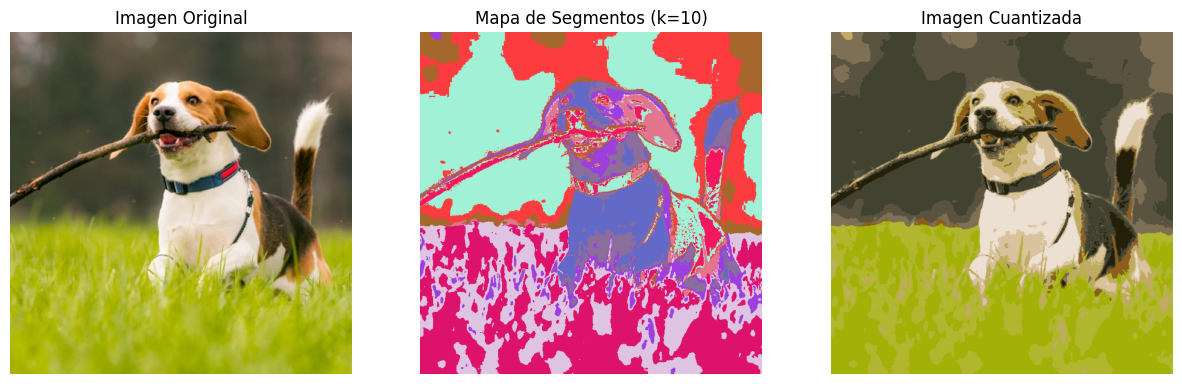

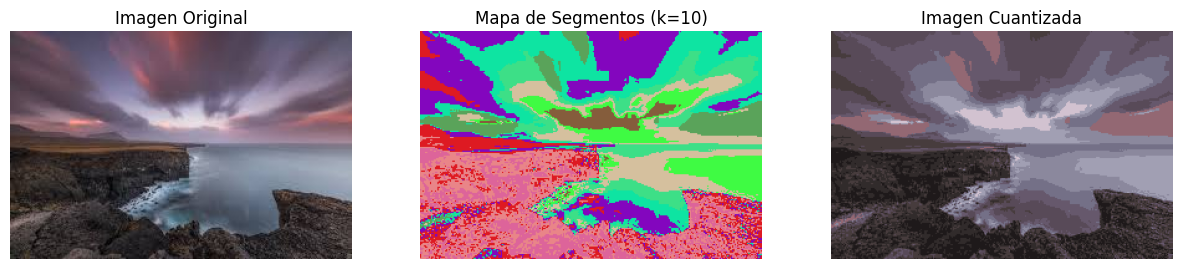

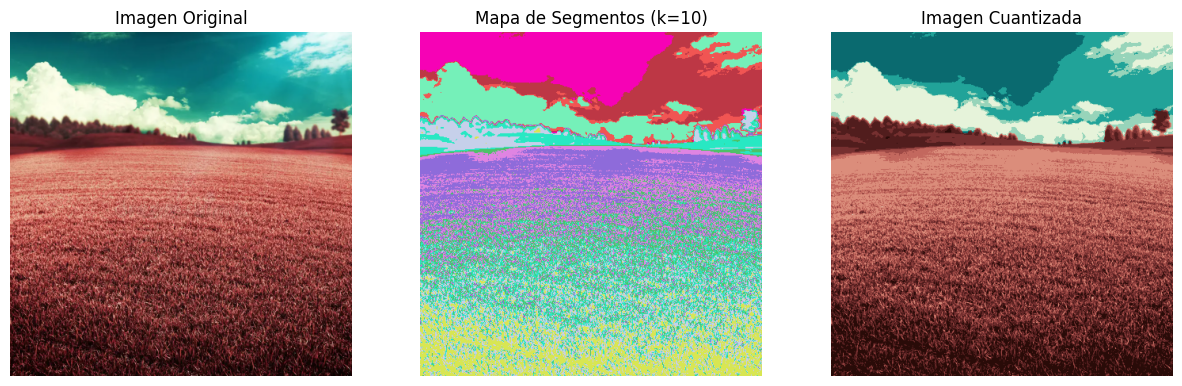

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def segmentation_rgb(image, k):

    x, y, z = image.shape
    pixels = image.reshape((-1, 3)) # Obtener dimensiones y convertirla a un arreglo de pixeles.

    pixels = np.float32(pixels) # Convertir los pixeles a float32

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    # Aplicar K-means
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers) # Convertir los centros a uint8
    
    # Crear la imagen cuantizada
    quantized_image = centers[labels.flatten()].reshape((x, y, z))
    
    # Crear el mapa de segmentos con colores únicos
    labels_reshaped = labels.reshape((x, y))
    segment_map = np.zeros((x, y, 3), dtype=np.uint8)

    colors = np.random.randint(0, 255, (k, 3), dtype=np.uint8)
    for i in range(k):
        segment_map[labels_reshaped == i] = colors[i]

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].imshow(image)
    axs[0].set_title("Imagen Original")
    axs[0].axis("off")
    
    axs[1].imshow(segment_map)
    axs[1].set_title(f"Mapa de Segmentos (k={k})")
    axs[1].axis("off")
    
    axs[2].imshow(quantized_image)
    axs[2].set_title("Imagen Cuantizada")
    axs[2].axis("off")
    
    plt.show()

good_image1 = "./assets/dog3.png"
good_image2 = "./assets/dog23.jpg"
bad_image1 = "./assets/iceland3.jpg"
bad_image2 = "./assets/landscape2.png"

good_image1 = cv2.imread(good_image1)
good_image2 = cv2.imread(good_image2)
bad_image1 = cv2.imread(bad_image1)
bad_image2 = cv2.imread(bad_image2)

good_image1 = cv2.cvtColor(good_image1, cv2.COLOR_BGR2RGB)
good_image2 = cv2.cvtColor(good_image2, cv2.COLOR_BGR2RGB)
bad_image1 = cv2.cvtColor(bad_image1, cv2.COLOR_BGR2RGB)
bad_image2 = cv2.cvtColor(bad_image2, cv2.COLOR_BGR2RGB)

k = int(input("Ingrese el numero de segmentos que desea utilizar: "))

while k < 2:
    k = int(input("Ingrese el numero de segmentos que desea utilizar: "))

segmentation_rgb(good_image1, k)
segmentation_rgb(good_image2, k)
segmentation_rgb(bad_image1, k)
segmentation_rgb(bad_image2, k)


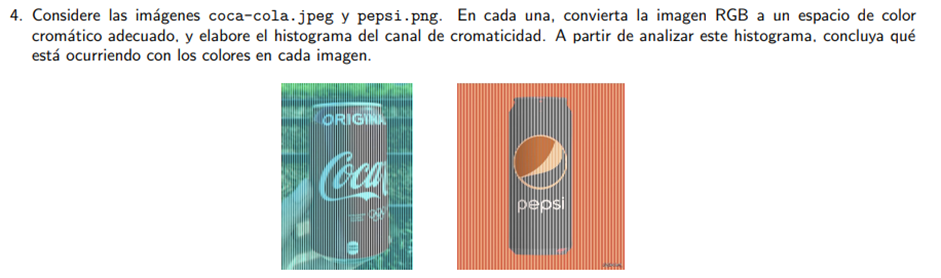

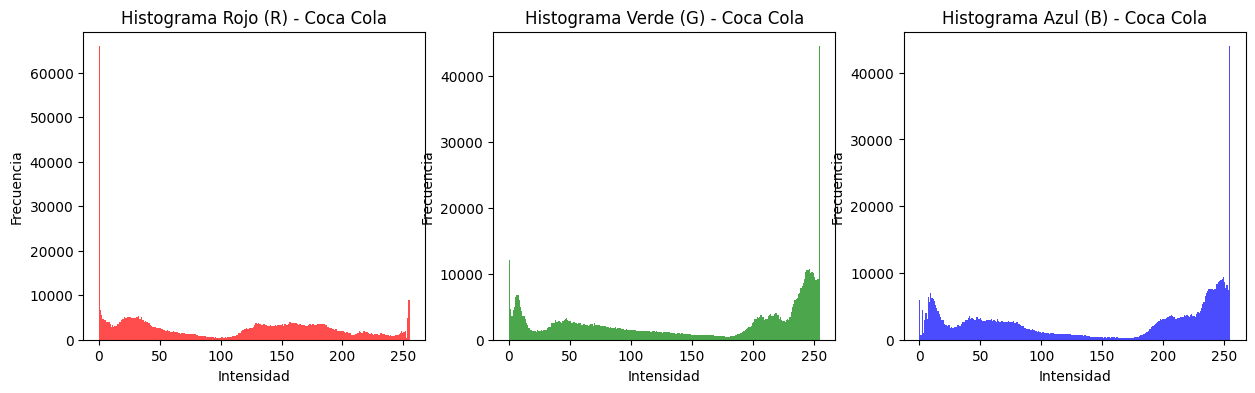

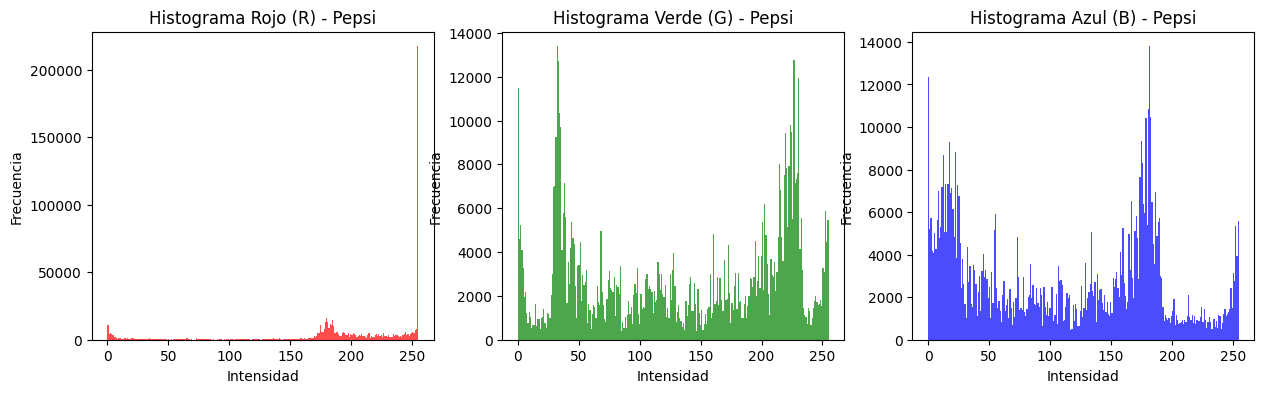

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def chromatic_histogram(image, R, G, B):
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.hist(R.ravel(), bins=256, color='red', alpha=0.7)
    plt.title(f"Histograma Rojo (R) - {image}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")

    plt.subplot(1, 3, 2)
    plt.hist(G.ravel(), bins=256, color='green', alpha=0.7)
    plt.title(f"Histograma Verde (G) - {image}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")

    plt.subplot(1, 3, 3)
    plt.hist(B.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title(f"Histograma Azul (B) - {image}")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")

    plt.show()

pepsi_image = "./assets/pepsi.png"
coke_image = "./assets/coca-cola.jpeg"

pepsi = cv2.imread(pepsi_image) # Leer las imágenes
coke = cv2.imread(coke_image)

pepsi = cv2.cvtColor(pepsi, cv2.COLOR_BGR2RGB) # Convertirlas a RGB
coke = cv2.cvtColor(coke, cv2.COLOR_BGR2RGB)

pepsi_R, pepsi_G, pepsi_B = pepsi[:, :, 0], pepsi[:, :, 1], pepsi[:, :, 2] # Extraer los canales de cromaticidad
coke_R, coke_G, coke_B = coke[:, :, 0], coke[:, :, 1], coke[:, :, 2]

# Mostrar los histogramas cromáticos
chromatic_histogram("Coca Cola", coke_R, coke_G, coke_B)
chromatic_histogram("Pepsi", pepsi_R, pepsi_G, pepsi_B)

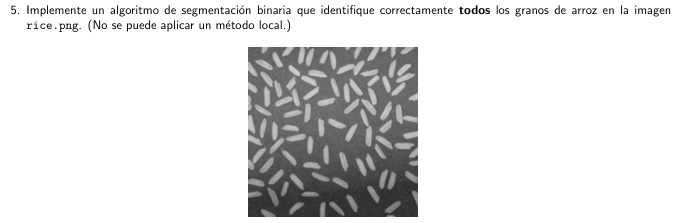

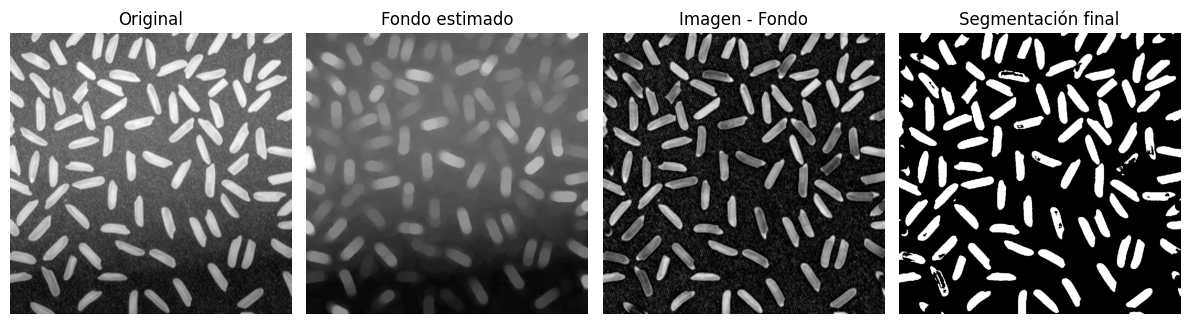

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io, filters, morphology
from skimage.color import rgb2gray

img = io.imread('./assets/rice.jpg')
if len(img.shape) == 3:
    img_gray = rgb2gray(img)
else:
    img_gray = img


selem = morphology.disk(15)
bg = morphology.opening(img_gray, selem)

img_sub = img_gray - bg

# Metodo Global OTSU
thresh_val = filters.threshold_otsu(img_sub)
binary = img_sub > thresh_val


binary_clean = morphology.remove_small_objects(binary, min_size=20)
binary_clean = morphology.remove_small_holes(binary_clean, area_threshold=20)

# Visualización de resultados
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(bg, cmap='gray')
axes[1].set_title('Fondo estimado')
axes[2].imshow(img_sub, cmap='gray')
axes[2].set_title('Imagen - Fondo')
axes[3].imshow(binary_clean, cmap='gray')
axes[3].set_title('Segmentación final')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()


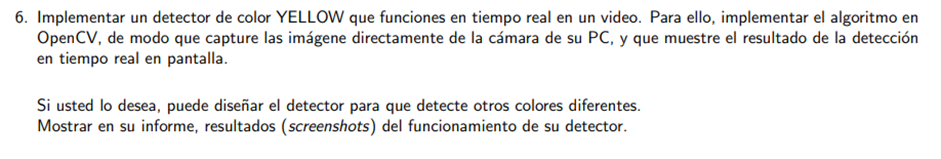

In [ ]:
# Código para Ejercicio 6.